In [107]:
import shutil, os, pandas as pd, numpy as np

# Collecting all garch
folder = 'sims/garch'
dest = folder 
files = []
count = 0

for filename in os.listdir(folder):
    count += 1
    if count > 3000:
        break
    
    try:
        info = _, random_state, gearing_cap, gamma, sigma, mr, yearly_rf, yearly_rm, cost = filename.split("_")
        vars_to_keep = (random_state, gearing_cap, gamma, yearly_rf, yearly_rm, cost[0])
        info_np = np.array(vars_to_keep)
        emp = np.repeat([info_np], 721, 0)
        data = pd.read_pickle(f'{folder}/{filename}')
        colnames = ['random_state', 'gearing_cap', 'gamma', 'yearly_rf', 'yearly_rm', 'cost']

        data[colnames] = emp
        files.append(data)
    except EOFError:
        print('EOF error')
        
#print(count)

In [108]:
combined = pd.concat(files)

In [109]:
combined.reset_index(inplace=True)
combined.set_index('random_state', inplace=True, drop=True)
combined.columns

Index(['period', 'savings', 'cash', 'new_equity', 'new_debt', 'total_debt',
       'pv_p', 'interest', 'market_returns', 'tv_u', 'dst', 'phase', 'SU_debt',
       'Nordnet_debt', '100', '9050', 'gearing_cap', 'gamma', 'yearly_rf',
       'yearly_rm', 'cost'],
      dtype='object')

In [110]:
combined

,period,savings,cash,new_equity,new_debt,total_debt,pv_p,interest,market_returns,tv_u,...,phase,SU_debt,Nordnet_debt,100,9050,gearing_cap,gamma,yearly_rf,yearly_rm,cost
random_state,,,,,,,,,,,,,,,,,,,,,
2954,0.0,1666.0,0.0,1666.0,2500.0,2500.0,4166.0,0.0,0.000000,4166.0,...,1.0,2500.0,0.0,1666.0,1666.0,1.5,1.8,0.02,0.05,0
2954,1.0,1666.0,0.0,1666.0,5000.0,7500.0,10833.0,13.0,0.074017,11621.0,...,1.0,2500.0,2500.0,3580.0,3555.0,1.5,1.8,0.02,0.05,0
2954,2.0,1666.0,0.0,1666.0,2364.0,9864.0,15652.0,20.0,0.022781,15988.0,...,1.0,3682.0,3682.0,5366.0,5330.0,1.5,1.8,0.02,0.05,0
2954,3.0,1666.0,0.0,1666.0,3644.0,13508.0,21299.0,30.0,0.013621,21559.0,...,1.0,5504.0,5504.0,7128.0,7083.0,1.5,1.8,0.02,0.05,0
2954,4.0,1666.0,0.0,1666.0,2134.0,15643.0,25361.0,36.0,-0.027653,24623.0,...,1.0,6571.0,6571.0,8552.0,8533.0,1.5,1.8,0.02,0.05,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250,716.0,8617.0,0.0,8617.0,0.0,0.0,131487504.0,0.0,0.028241,135200890.0,...,3.0,0.0,0.0,78686396.0,54982049.0,1,1.8,0.02,0.04,0
1250,717.0,8617.0,0.0,8617.0,0.0,0.0,135209507.0,0.0,-0.000831,135097119.0,...,3.0,0.0,0.0,78629602.0,54952498.0,1,1.8,0.02,0.04,0
1250,718.0,8617.0,0.0,8617.0,0.0,0.0,135105737.0,0.0,0.011937,136718440.0,...,3.0,0.0,0.0,79576892.0,55586050.0,1,1.8,0.02,0.04,0


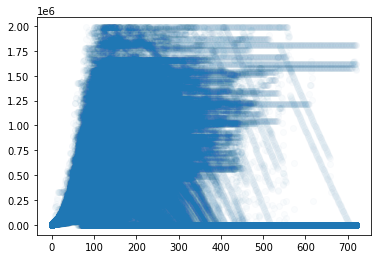

In [111]:
import matplotlib.pyplot as plt

plt.scatter(x = combined['period'], y = combined['total_debt'], alpha = 0.02)

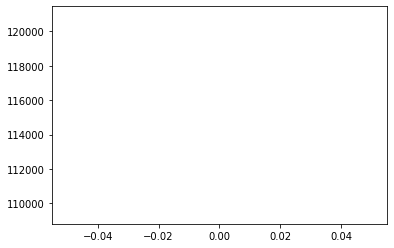